In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
df=pd.read_csv("C:/Users/sanke/OneDrive/Documents/Superstore_2023.csv")

In [15]:
df.head()

,Category,City,Country/Region,Customer ID,Customer Name,Order Date,Order ID,Order Profitable?,Postal Code,Product ID,...,Ship Status,State,Sub-Category,Days to Ship Actual,Days to Ship Scheduled,Discount,Profit,Quantity,Sales,Sales Forecast
0,Furniture,Henderson,United States,CG-12520,Claire Gute,08-11-2021,CA-2021-152156,Profitable,42420.0,FUR-BO-10001798,...,Shipped On Time,Kentucky,Bookcases,3,3,0.00%,42,2,262,392
1,Furniture,Henderson,United States,CG-12520,Claire Gute,08-11-2021,CA-2021-152156,Profitable,42420.0,FUR-CH-10000454,...,Shipped On Time,Kentucky,Chairs,3,3,0.00%,220,3,732,1096
2,Office Supplies,Los Angeles,United States,DV-13045,Darrin Van Huff,12-06-2021,CA-2021-138688,Profitable,90036.0,OFF-LA-10000240,...,Shipped Late,California,Labels,4,3,0.00%,7,2,15,22
3,Furniture,Fort Lauderdale,United States,SO-20335,Sean O'Donnell,11-10-2020,US-2020-108966,Unprofitable,33311.0,FUR-TA-10000577,...,Shipped Late,Florida,Tables,7,6,45.00%,-383,5,958,1434
4,Office Supplies,Fort Lauderdale,United States,SO-20335,Sean O'Donnell,11-10-2020,US-2020-108966,Unprofitable,33311.0,OFF-ST-10000760,...,Shipped Late,Florida,Storage,7,6,20.00%,3,2,22,33


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                9994 non-null   object 
 1   City                    9994 non-null   object 
 2   Country/Region          9994 non-null   object 
 3   Customer ID             9994 non-null   object 
 4   Customer Name           9994 non-null   object 
 5   Order Date              9994 non-null   object 
 6   Order ID                9994 non-null   object 
 7   Order Profitable?       9994 non-null   object 
 8   Postal Code             9983 non-null   float64
 9   Product ID              9994 non-null   object 
 10  Product Name            9994 non-null   object 
 11  Region                  9994 non-null   object 
 12  Row ID                  9994 non-null   int64  
 13  Segment                 9994 non-null   object 
 14  Ship Date               9994 non-null   

In [19]:
## Data Cleaning

In [21]:
# Convert 'Order Date' and 'Ship Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Handle missing postal codes (optional)
df['Postal Code'].fillna(0, inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert Discount column to numeric (if needed)
df['Discount'] = df['Discount'].replace('%','', regex=True).astype(float, errors='ignore')


C:\Users\sanke\AppData\Local\Temp\ipykernel_19996\1887570800.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(0, inplace=True)


In [23]:
## Data Aggregration

In [25]:
# Group by Region and sum up Sales and Profit
region_sales = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

print(region_sales)


          Sales  Profit
Region                 
West     725514  108386
East     678834   91521
Central  501256   39719
South    391750   46721


In [27]:
## Visualize sales by region

C:\Users\sanke\AppData\Local\Temp\ipykernel_19996\2270146795.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales['Sales'], palette='viridis')


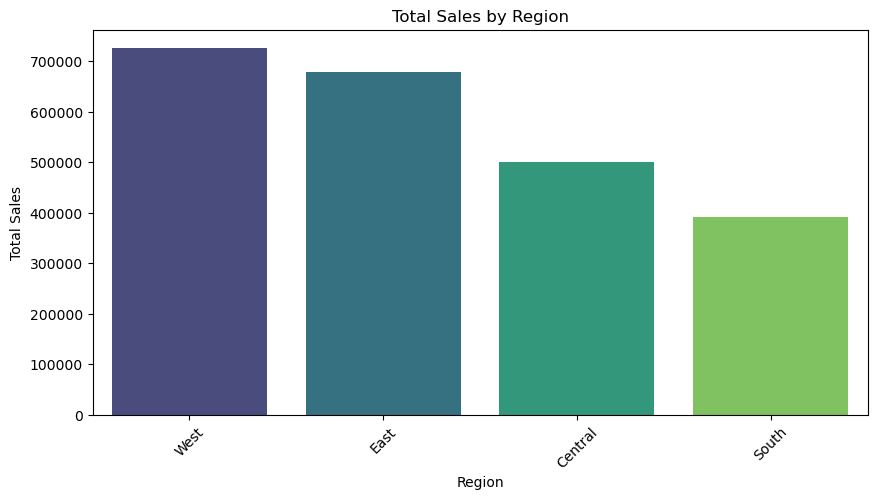

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x=region_sales.index, y=region_sales['Sales'], palette='viridis')
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


In [31]:
## Data Aggregration- sales by category

In [33]:
# Group by Product Category
category_sales = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
print(category_sales)


                  Sales  Profit
Category                       
Technology       836221  145429
Furniture        742006   18444
Office Supplies  719127  122474


In [35]:
## Visualize sales by product category

C:\Users\sanke\AppData\Local\Temp\ipykernel_19996\3195266276.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales['Sales'], palette='coolwarm')


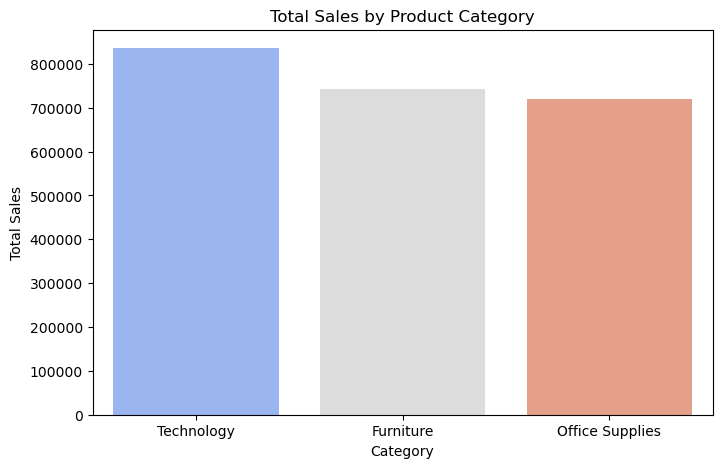

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales['Sales'], palette='coolwarm')
plt.title("Total Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()


In [39]:
## Identify Top-performing regions

In [41]:
top_regions = region_sales.head(3)
print("Top 3 Regions by Sales:")
print(top_regions)


Top 3 Regions by Sales:
          Sales  Profit
Region                 
West     725514  108386
East     678834   91521
Central  501256   39719
